In [1]:
import pandas as pd
import nibabel as nib
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
titlenamelist = ['unet_full', 'unet_pocket','resnet_pocket','resnet_full', 'densenet_pocket','densenet_full']




34


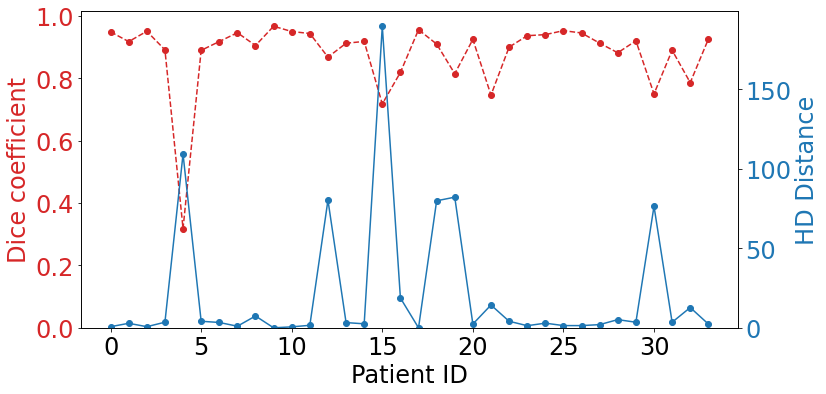

1193512.0
0.8191310930243562
34


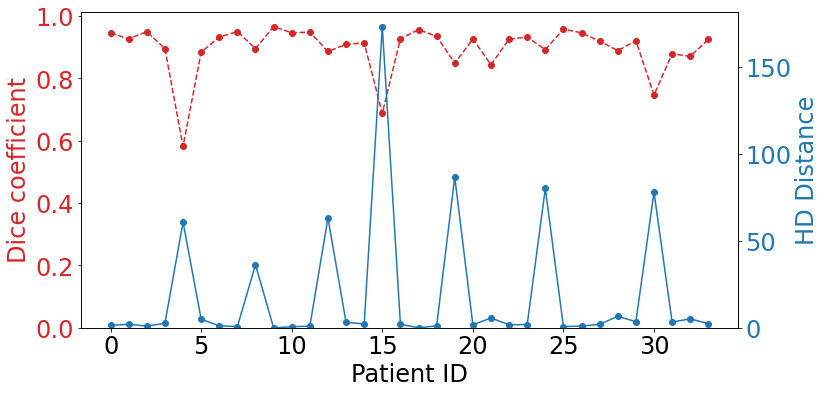

1193512.0
0.9271866063186172
34


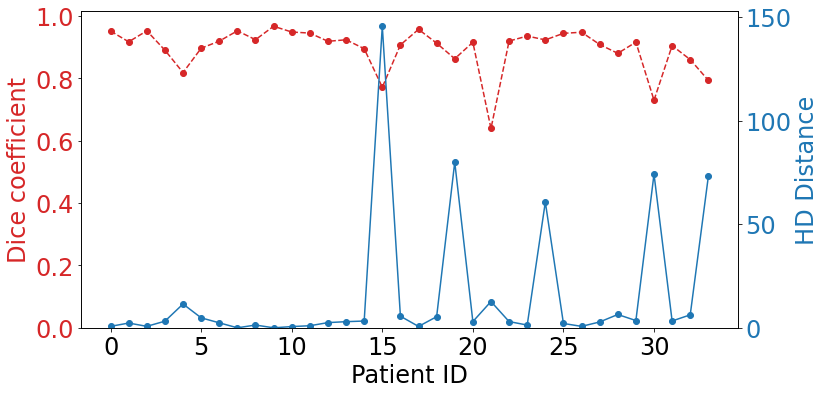

1193512.0
0.9072682801144968
34


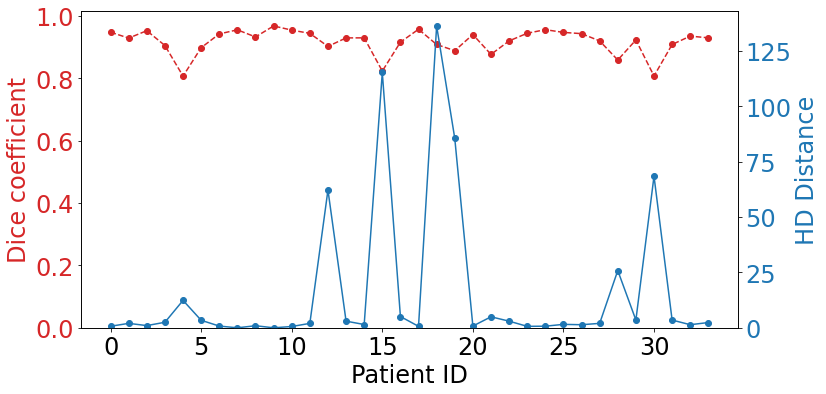

1193512.0
0.9160377081436668
34


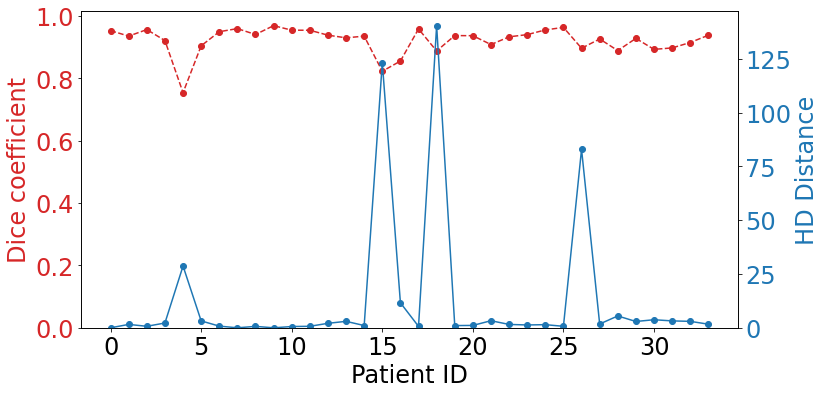

1193512.0
0.855501181588138
34


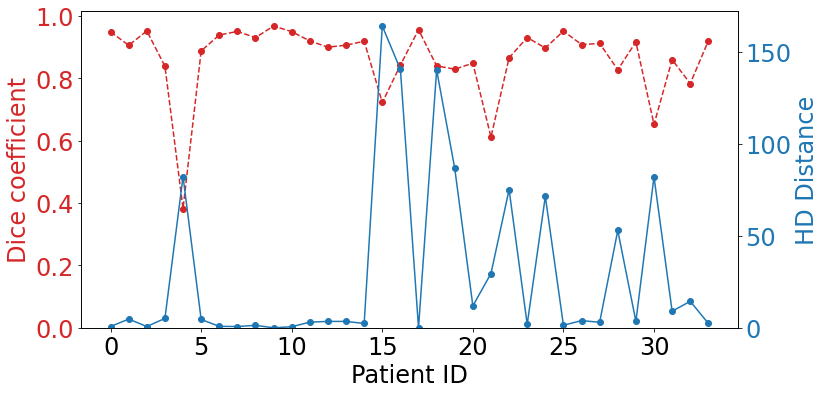

1193512.0
0.8423485380179117


In [2]:
for titlename in titlenamelist:

    savePath = '/rsrch1/ip/rglenn1/data/results/4_channel_w_bias_correction/'

    results = '/rsrch1/ip/rglenn1/data/results/4_channel_w_bias_correction/'+ titlename +'_detection_dice_performance.csv'
    hcc_results = pd.DataFrame(pd.read_csv(results))


    Liver_dice = hcc_results['Liver_dice']
    Liver_haus95 = hcc_results['Liver_haus95']
    id = hcc_results['id']


    patientID = hcc_results.id.unique()
    Liver_dice = []
    Liver_haus95 = []
    print(len(patientID))
    for patid in patientID:
        tmp = hcc_results.loc[hcc_results['id'] == patid]
        Liver_dice.append(np.mean(tmp['Liver_dice']))
        tmp = hcc_results.loc[hcc_results['id'] == patid]
        Liver_haus95.append(np.mean(tmp['Liver_haus95']))

    id =patientID
    yDice = [x for _, x in sorted(zip(id, Liver_dice))]
    yHaus95 = [x for _, x in sorted(zip(id, Liver_haus95))]
    x = range(len(id))

    plt.rcParams['font.size'] = '24'
    fig, ax1 = plt.subplots(figsize=(12, 6))

    color = 'tab:red'
    ax1.set_xlabel('Patient ID')
    ax1.set_ylabel('Dice coefficient', color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.plot(x, yDice, linestyle="--", marker="o", label='Dice coefficient', color=color)
    ax1.set_ylim(0, 1.05*max(yDice))


    ax2 = ax1.twinx()

    color = 'tab:blue'
    ax2.set_ylabel('HD Distance', color=color)
    ax2.plot(x, yHaus95, linestyle="-", marker="o",  label='95% HD Truth & Prediction', color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_ylim(0, 1.05*max(yHaus95))

    fig.tight_layout()

    #ax2.set_title(titlename)

    plt.savefig(savePath + "/" + titlename + '_detection_stats.png', bbox_inches="tight")
    plt.show() 
    print(id[16])
    print(yDice[16])

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPUs will likely run quickly with dtype policy mixed_float16 as they all have compute capability of at least 7.0


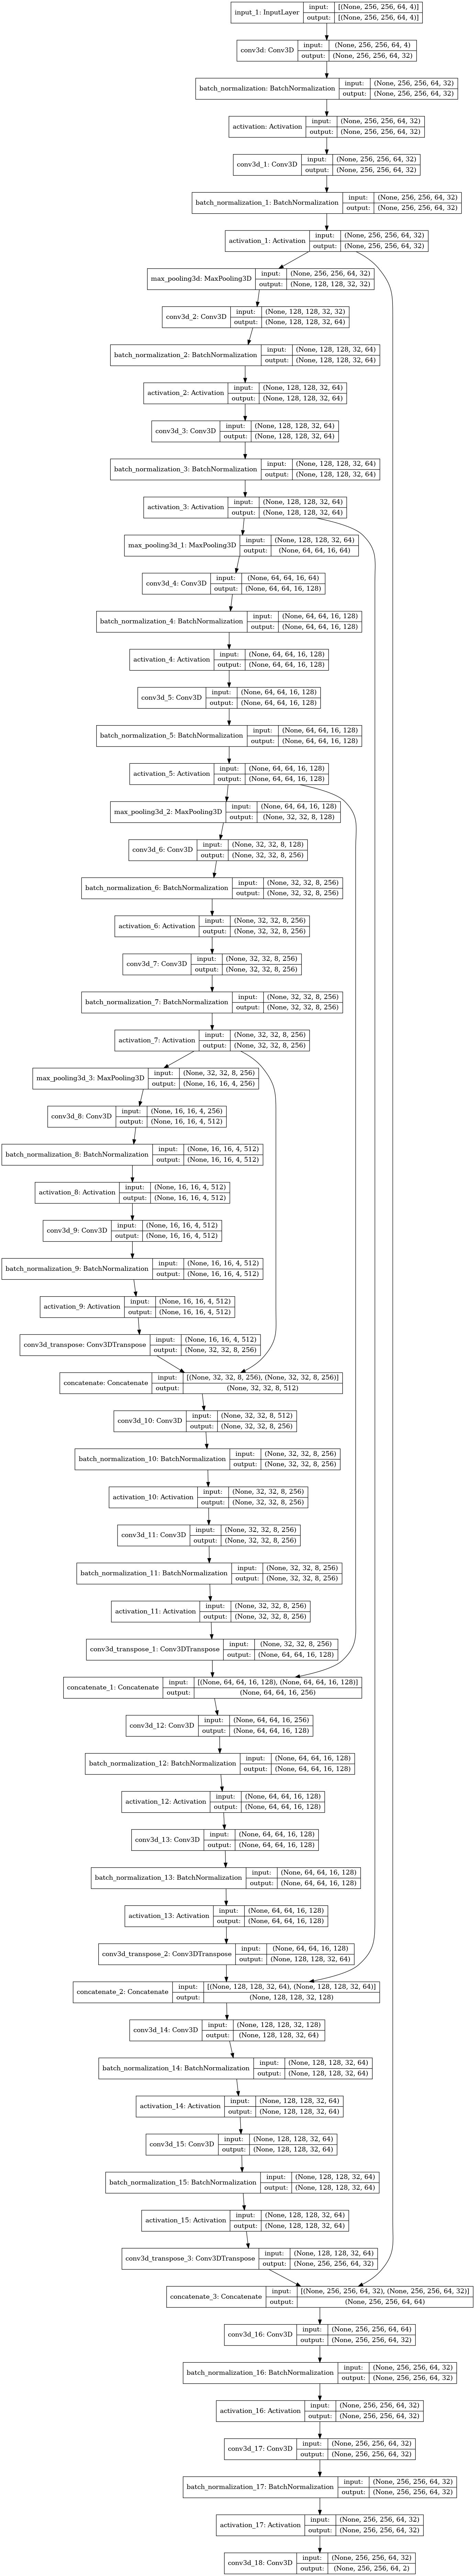

In [3]:
import tensorflow as tf
import tensorflow
import keras

titlenamelist = ['unet_full', 'unet_pocket','resnet_pocket','resnet_full', 'densenet_pocket','densenet_full']

export_dir = '/rsrch1/ip/rglenn1/data/models_4_channel_w_bc/' + titlenamelist[0] + '_detection_best_model_split'
model = keras.models.load_model(export_dir, compile=False)
#model.summary()
#! pip install pydot graphviz
#from keras.utils.vis_utils import plot_model
tensorflow.keras.utils.plot_model(model,  show_shapes=True, show_layer_names=True)#to_file='model_plot.png',

68


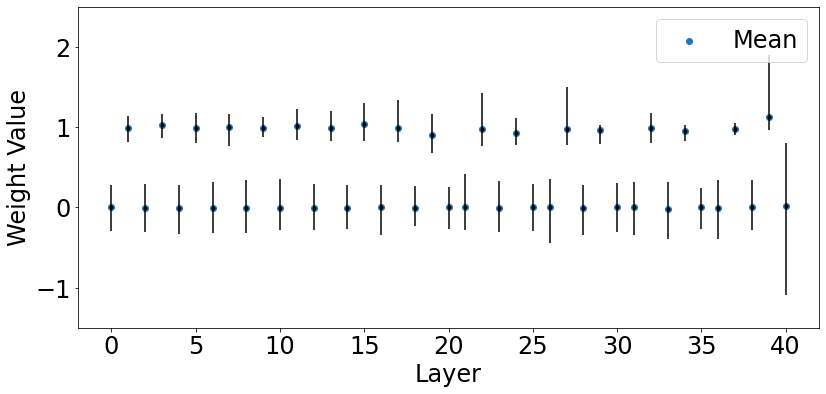

68


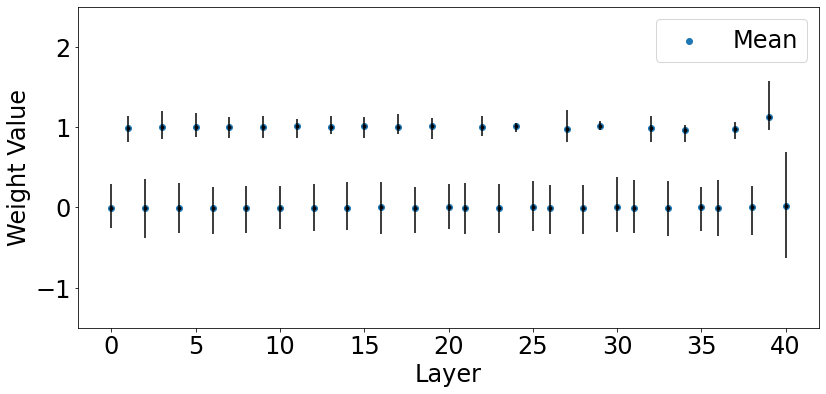

95


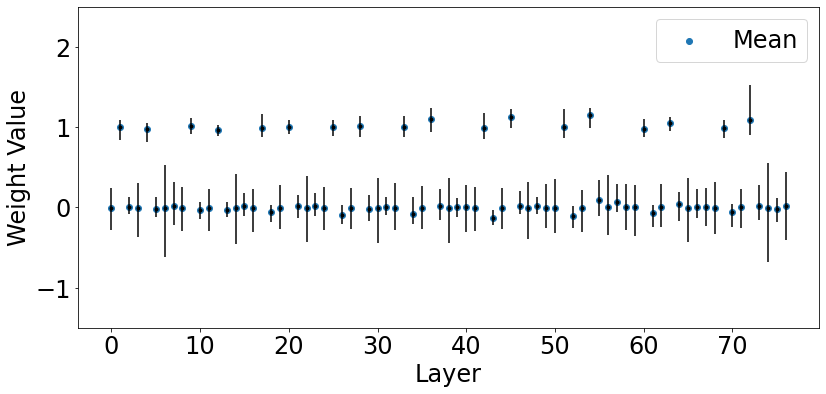

95


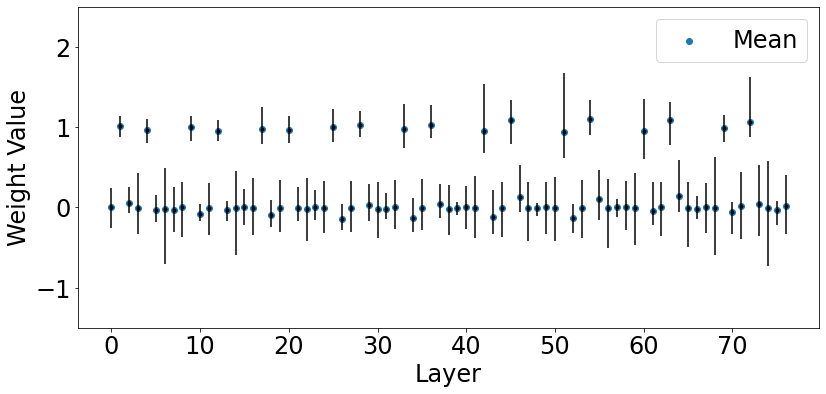

104


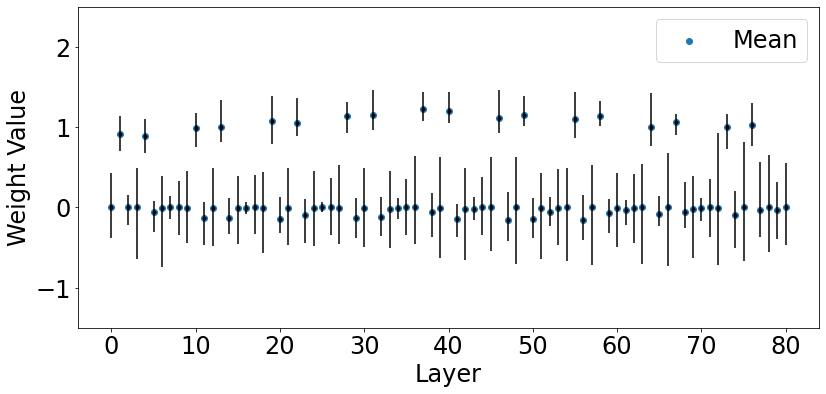

104


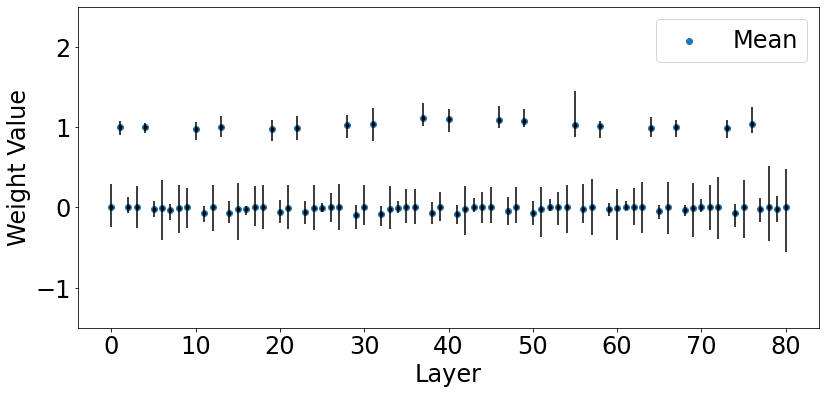

In [5]:
for titlename in titlenamelist:
    export_dir = '/rsrch1/ip/rglenn1/data/models_4_channel_w_bc/' + titlename + '_detection_best_model_split'
    model = keras.models.load_model(export_dir, compile=False)
    #model.summary()


    yerr =[]
    layer_mean_list = []
    print(len(model.layers))
    for i in range(1, len(model.layers)):
        #print(i)
        try:

            layer_max = (np.amax(model.layers[i].get_weights()[0]))
            layer_min = (np.amin(model.layers[i].get_weights()[0]))
            layer_mean = (np.mean(model.layers[i].get_weights()[0]))
            layer_mean_list.append(layer_mean)

            yerr.append([layer_mean - layer_min, layer_max - layer_mean])
        except:
            pass

    yerr = np.transpose(yerr)
    plt.rcParams['font.size'] = '24'
    fig, ax1 = plt.subplots(figsize=(12, 6))
    color = 'tab:blue'
    ax1.set_ylabel('Weight Value')
    ax1.set_xlabel('Layer')

    ax1.scatter(range(len(layer_mean_list)), layer_mean_list, linestyle="-",   label='Mean')

    ax1.errorbar(range(len(layer_mean_list)), layer_mean_list, yerr=yerr, fmt='.k')
    ax1.tick_params(axis='y')
    #ax1.set_ylim(0, max(learningrate))
    ax1.set_ylim(-1.5,2.5)

    fig.tight_layout()



    plt.savefig(savePath + "/" + titlename + '_weights.png', bbox_inches="tight")
    plt.legend()
    plt.show() 

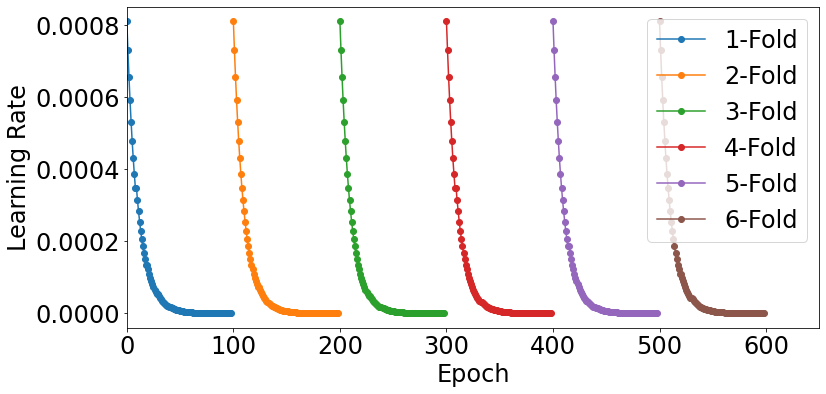

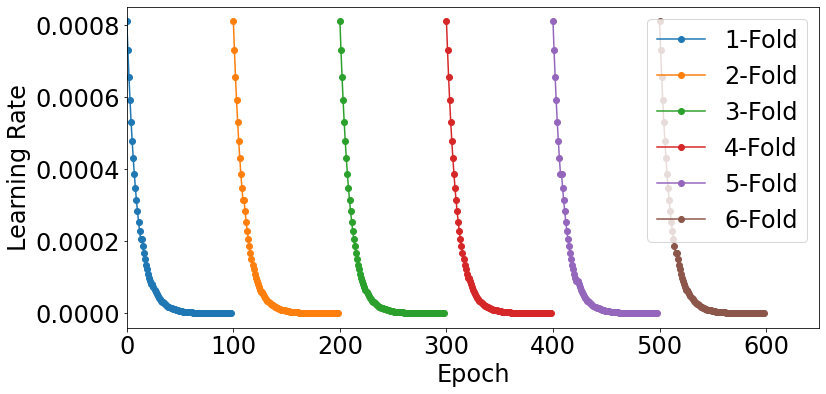

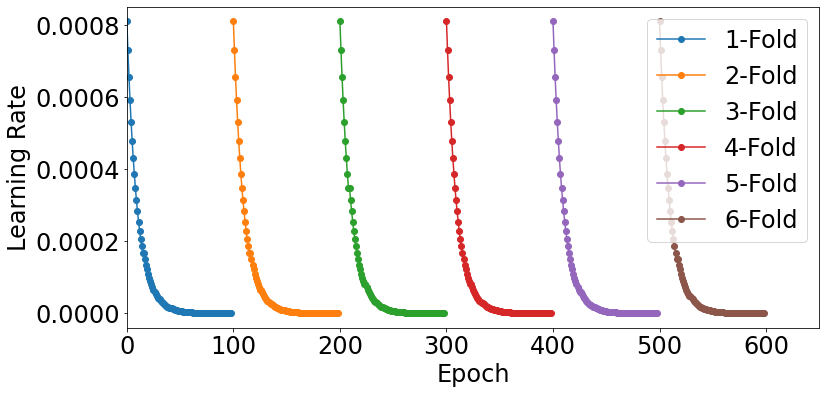

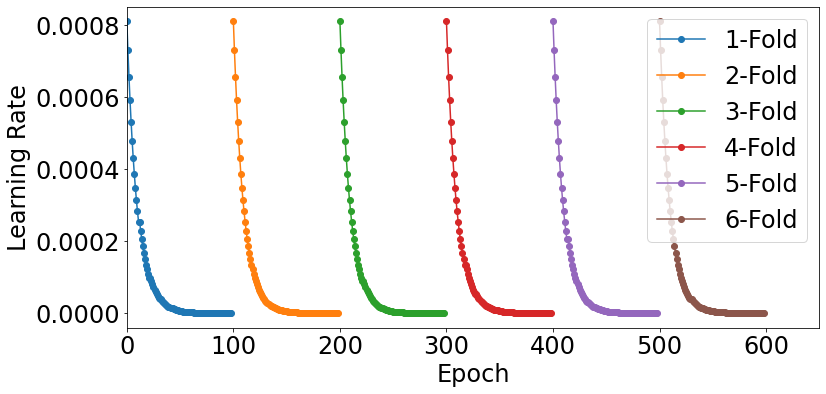

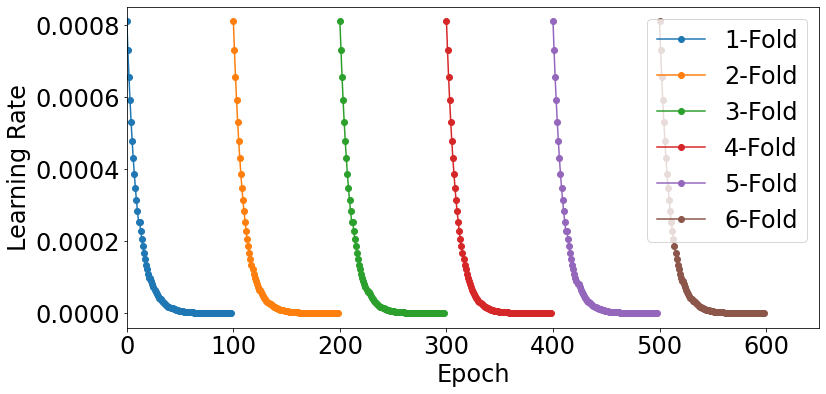

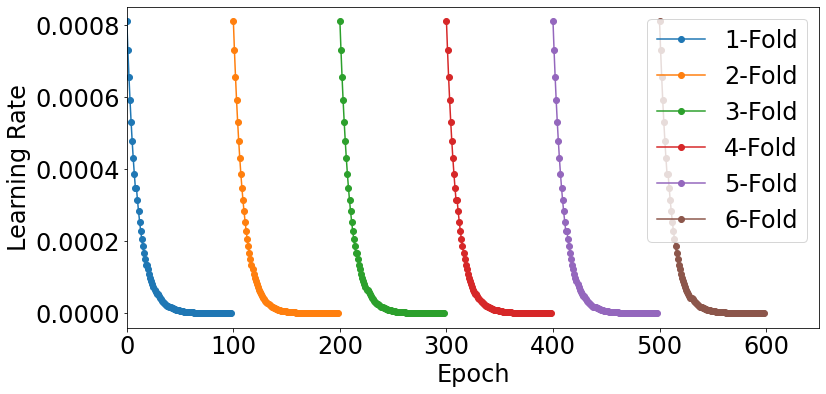

In [7]:

for titlename in titlenamelist:
    savePath = '/rsrch1/ip/rglenn1/data/results/4_channel_w_bias_correction'


    results = '/rsrch1/ip/rglenn1/data/results/4_channel_w_bias_correction/'+ titlename +'_detection_learningrate.csv'
    learningrate = pd.DataFrame(pd.read_csv(results))

    kFold1 = learningrate[0:99]
    kFold2 = learningrate[100:199]
    kFold3 = learningrate[200:299]
    kFold4 = learningrate[300:399]
    kFold5 = learningrate[400:499]
    kFold6 = learningrate[500:599]

    epoch_1fold = range(0,99)
    epoch_2fold = range(100,199) 
    epoch_3fold = range(200,299)
    epoch_4fold = range(300,399)
    epoch_5fold = range(400,499)
    epoch_6fold = range(500,599)

    plt.rcParams['font.size'] = '24'
    fig, ax1 = plt.subplots(figsize=(12, 6))
    color = 'tab:blue'
    ax1.set_ylabel('Learning Rate')
    ax1.set_xlabel('Epoch')
    ax1.plot(epoch_1fold, kFold1, linestyle="-", marker="o",  label='1-Fold')
    ax1.plot(epoch_2fold, kFold2, linestyle="-", marker="o",  label='2-Fold')
    ax1.plot(epoch_3fold, kFold3, linestyle="-", marker="o",  label='3-Fold')
    ax1.plot(epoch_4fold, kFold4, linestyle="-", marker="o",  label='4-Fold')
    ax1.plot(epoch_5fold, kFold5, linestyle="-", marker="o",  label='5-Fold')
    ax1.plot(epoch_6fold, kFold6, linestyle="-", marker="o",  label='6-Fold')
    ax1.tick_params(axis='y')
    #ax1.set_ylim(0, max(learningrate))
    ax1.set_xlim(0,650)

    fig.tight_layout()

    

    plt.savefig(savePath + "/" + titlename + '_detection_learning.png', bbox_inches="tight")
    plt.legend()
    plt.show() 


     1.983224302530288696e-01
0                    0.093912
1                    0.110115
2                    0.094044
3                    0.117466
4                    0.147329
..                        ...
594                  0.036297
595                  0.036314
596                  0.036280
597                  0.036321
598                  0.036474

[599 rows x 1 columns]


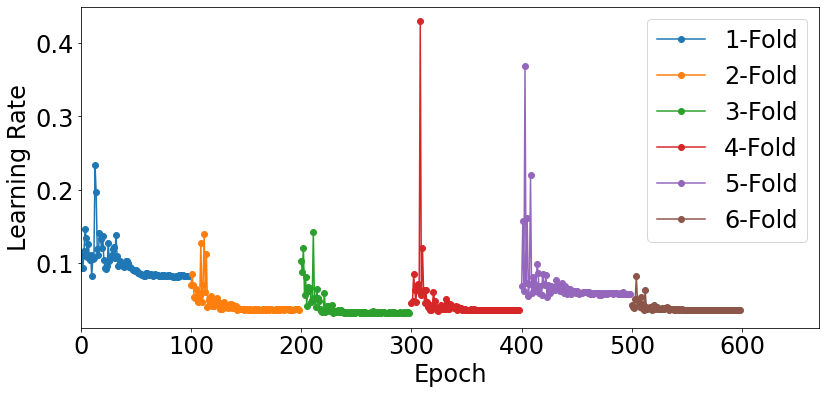

     5.040840506553649902e-01
0                    0.188332
1                    0.126412
2                    0.112651
3                    0.142552
4                    0.099159
..                        ...
594                  0.031919
595                  0.031703
596                  0.031970
597                  0.031737
598                  0.031814

[599 rows x 1 columns]


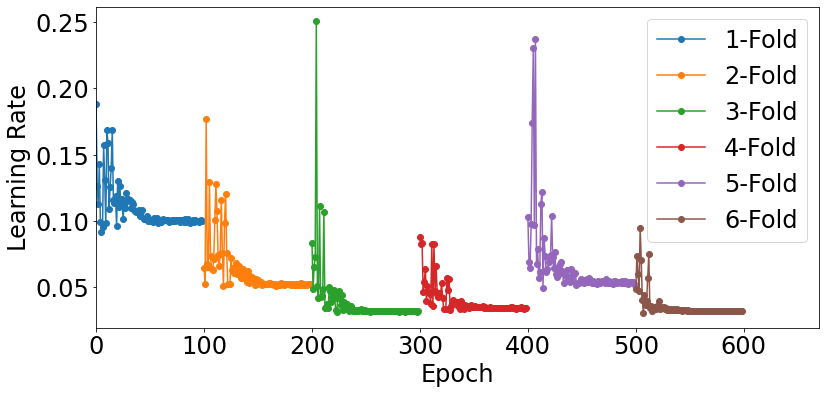

     9.464285522699356079e-02
0                    0.081383
1                    0.092315
2                    0.078617
3                    0.480073
4                    0.324968
..                        ...
594                  0.032217
595                  0.032117
596                  0.032259
597                  0.032380
598                  0.032228

[599 rows x 1 columns]


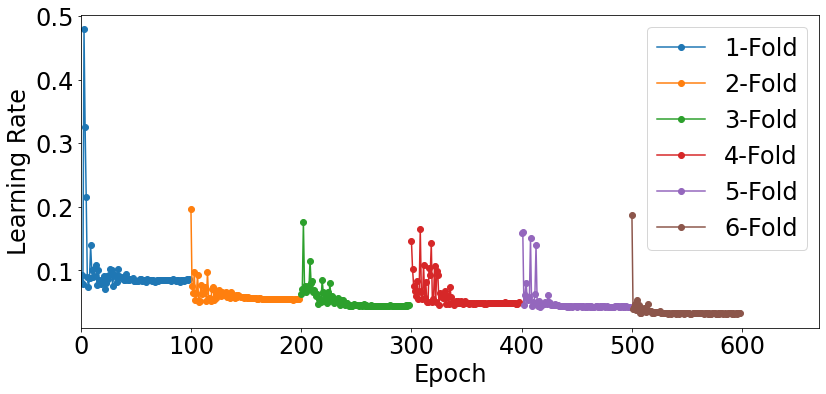

     1.011994108557701111e-01
0                    0.091731
1                    0.076583
2                    0.105413
3                    0.076336
4                    0.100706
..                        ...
594                  0.028012
595                  0.027918
596                  0.027990
597                  0.027980
598                  0.027992

[599 rows x 1 columns]


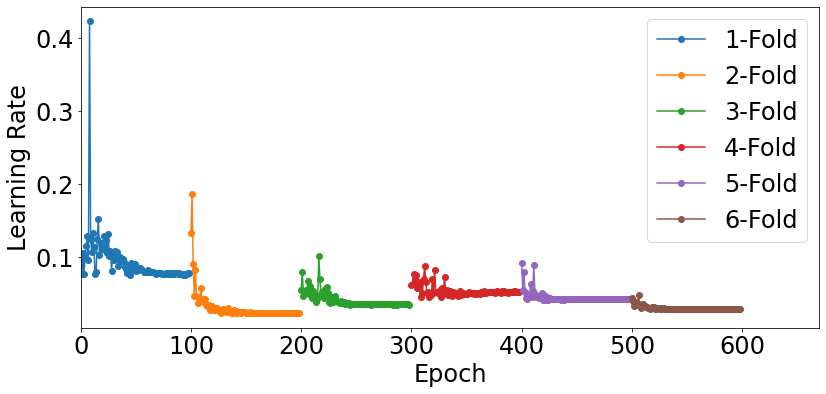

     7.066587358713150024e-02
0                    0.150719
1                    0.062317
2                    0.062070
3                    0.042744
4                    0.054311
..                        ...
594                  0.027098
595                  0.027056
596                  0.026935
597                  0.027120
598                  0.026989

[599 rows x 1 columns]


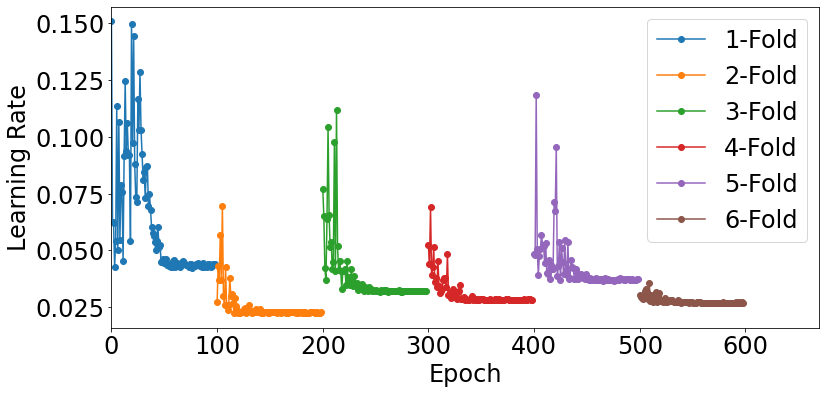

     1.112609282135963440e-01
0                    0.065345
1                    0.116756
2                    0.131211
3                    0.073599
4                    0.242399
..                        ...
594                  0.033795
595                  0.033803
596                  0.033734
597                  0.033677
598                  0.033648

[599 rows x 1 columns]


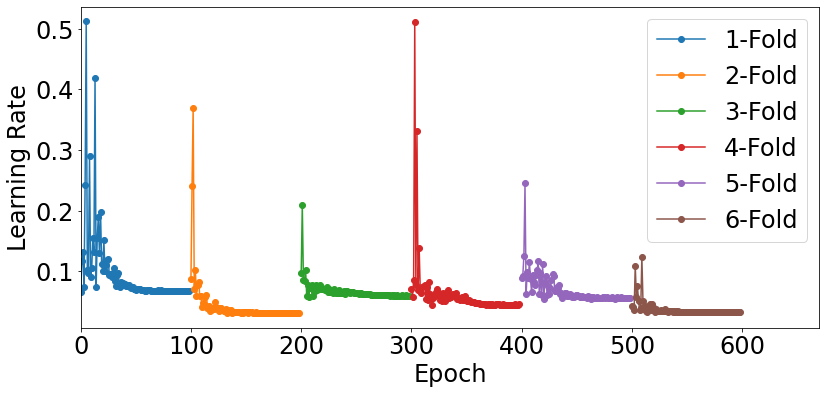

In [8]:

savePath = '/rsrch1/ip/rglenn1/data/results/4_channel_w_bias_correction/'
titlename = 'densenet_pocket'


for titlename in titlenamelist:

    results = '/rsrch1/ip/rglenn1/data/results/4_channel_w_bias_correction/'+ titlename +'_detection_loss.csv'
    learningrate = pd.DataFrame(pd.read_csv(results))
    print(learningrate)

    kFold1 = learningrate[0:99]
    kFold2 = learningrate[100:199]
    kFold3 = learningrate[200:299]
    kFold4 = learningrate[300:399]
    kFold5 = learningrate[400:499]
    kFold6 = learningrate[500:599]

    epoch_1fold = range(0,99)
    epoch_2fold = range(100,199) 
    epoch_3fold = range(200,299)
    epoch_4fold = range(300,399)
    epoch_5fold = range(400,499)
    epoch_6fold = range(500,599)

    plt.rcParams['font.size'] = '24'
    fig, ax1 = plt.subplots(figsize=(12, 6))
    color = 'tab:blue'
    ax1.set_ylabel('Learning Rate')
    ax1.set_xlabel('Epoch')
    ax1.set_xlabel('Epoch')
    ax1.plot(epoch_1fold, kFold1, linestyle="-", marker="o",  label='1-Fold')
    ax1.plot(epoch_2fold, kFold2, linestyle="-", marker="o",  label='2-Fold')
    ax1.plot(epoch_3fold, kFold3, linestyle="-", marker="o",  label='3-Fold')
    ax1.plot(epoch_4fold, kFold4, linestyle="-", marker="o",  label='4-Fold')
    ax1.plot(epoch_5fold, kFold5, linestyle="-", marker="o",  label='5-Fold')
    ax1.plot(epoch_6fold, kFold6, linestyle="-", marker="o",  label='6-Fold')
    ax1.tick_params(axis='y')
    #ax1.set_ylim(0, max(learningrate))
    ax1.set_xlim(0,670)

    fig.tight_layout()

    #ax1.set_title(titlename)

    plt.savefig(savePath + "/" + titlename + '_detection_loss.png', bbox_inches="tight")
    plt.legend()
    plt.show() 

In [9]:
import numpy as np
titlenamelist = ['unet_full', 'unet_pocket','resnet_pocket','resnet_full', 'densenet_pocket','densenet_full']

titlename = titlenamelist[3]
for titlename in titlenamelist:

    savePath = '/rsrch1/ip/rglenn1/data/results/4_channel_w_bias_correction'

    results = '/rsrch1/ip/rglenn1/data/results/4_channel_w_bias_correction/'+ titlename +'_detection_dice_performance.csv'
    hcc_results = pd.DataFrame(pd.read_csv(results))


    Liver_dice = hcc_results['Liver_dice']
    Liver_haus95 = hcc_results['Liver_haus95']
    id = hcc_results['id']


    patientID = hcc_results.id.unique()
    Liver_dice = []
    Liver_haus95 = []
    print(len(patientID))
    for patid in patientID:
        tmp = hcc_results.loc[hcc_results['id'] == patid]
        Liver_dice.append(np.mean(tmp['Liver_dice']))
        tmp = hcc_results.loc[hcc_results['id'] == patid]
        Liver_haus95.append(np.mean(tmp['Liver_haus95']))

    id =patientID
    yDice = [x for _, x in sorted(zip(id, Liver_dice))]
    yHaus95 = [x for _, x in sorted(zip(id, Liver_haus95))]
    x = range(len(id))






    headers = [titlename, "Mean", "Median", "Min", "Max", "Std"]

    diceList = ["Dice Similarity Coefficient (" + titlename + ")", np.mean(yDice), np.median(yDice),  min(yDice), max(yDice), np.std(yDice)]
    hdList = ["95th--percentile Hausdorff Distance (" + titlename + ")", np.mean(yHaus95), np.median(yHaus95),  min(yHaus95), max(yHaus95), np.std(yHaus95)]
    data = pd.DataFrame([ diceList, hdList], columns=headers)

    data.to_csv(savePath + "/" + titlename +'_anay' + '.csv', mode='a', index=False, header=False )

    print(data)

34
                                         unet_full       Mean    Median  \
0          Dice Similarity Coefficient (unet_full)   0.878836  0.915361   
1  95th--percentile Hausdorff Distance (unet_full)  21.335362  3.317944   

        Min         Max        Std  
0  0.318298    0.967161   0.116430  
1  0.000000  189.762295  41.610601  
34
                                         unet_pocket       Mean    Median  \
0          Dice Similarity Coefficient (unet_pocket)   0.895833  0.922834   
1  95th--percentile Hausdorff Distance (unet_pocket)  18.731107  2.154970   

        Min         Max        Std  
0  0.581727    0.965756   0.078497  
1  0.000000  172.942169  37.228299  
34
                                       resnet_pocket       Mean    Median  \
0        Dice Similarity Coefficient (resnet_pocket)   0.895646  0.916645   
1  95th--percentile Hausdorff Distance (resnet_po...  15.504398  3.000000   

        Min         Max        Std  
0  0.639224    0.967093   0.069464  
1  0.

In [14]:
import pydicom
from pydicom.dataset import Dataset, FileDataset
from pydicom.uid import ExplicitVRLittleEndian
import pydicom._storage_sopclass_uids
import numpy as np
import os

patientID = '1052473'
patientID = '1091400'
pred ='/rsrch1/ip/rglenn1/data/predictions/' + patientID +'.nii.gz'
truth = '/rsrch1/ip/rglenn1/data/Processed/' + patientID +'/Truth.raw.nii.gz'
art = '/rsrch1/ip/rglenn1/data/Processed/' + patientID +'/Art.raw.nii.gz'
pre = '/rsrch1/ip/rglenn1/data/Processed/' + patientID +'/Pre.raw.nii.gz'
ven = '/rsrch1/ip/rglenn1/data/Processed/' + patientID +'/Ven.raw.nii.gz'
 
img_pred = nib.load(pred).get_fdata()
img_truth = nib.load(truth).get_fdata()
img_art = nib.load(art).get_fdata()
img_ven = nib.load(ven).get_fdata()
img_pre = nib.load(pre).get_fdata()



def convertNsave(image2d, filepath, index=0):
    """
    `arr`: parameter will take a numpy array that represents only one slice.
    `file_dir`: parameter will take the path to save the slices
    `index`: parameter will represent the index of the slice, so this parameter will be used to put 
    the name of each slice while using a for loop to convert all the slices
    """
    image2d = image2d.astype(np.uint16)

    #print("Setting file meta information...")
    # Populate required values for file meta information

    meta = pydicom.Dataset()
    meta.MediaStorageSOPClassUID = pydicom._storage_sopclass_uids.MRImageStorage
    meta.MediaStorageSOPInstanceUID = pydicom.uid.generate_uid()
    meta.TransferSyntaxUID = pydicom.uid.ExplicitVRLittleEndian  
    ds = Dataset()
    ds.file_meta = meta

    ds.is_little_endian = True
    ds.is_implicit_VR = False

    ds.SOPClassUID = pydicom._storage_sopclass_uids.CTImageStorage
    ds.PatientName = "TestFirstname"
    ds.PatientID = patientID

    ds.Modality = "MR"
    ds.SeriesInstanceUID = pydicom.uid.generate_uid()
    ds.StudyInstanceUID = pydicom.uid.generate_uid()
    ds.FrameOfReferenceUID = pydicom.uid.generate_uid()

    ds.BitsStored = 16
    ds.BitsAllocated = 16
    ds.SamplesPerPixel = 1
    ds.HighBit = 15

    ds.ImagesInAcquisition = "1"

    ds.Rows = image2d.shape[0]
    ds.Columns = image2d.shape[1]
    ds.InstanceNumber = 1

    ds.ImagePositionPatient = r"0\0\1"
    ds.ImageOrientationPatient = r"1\0\0\0\-1\0"
    ds.ImageType = r"ORIGINAL\PRIMARY\AXIAL"

    ds.RescaleIntercept = "0"
    ds.RescaleSlope = "1"
    ds.PixelSpacing = r"1\1"
    ds.PhotometricInterpretation = "MONOCHROME2"
    ds.PixelRepresentation = 1

    pydicom.dataset.validate_file_meta(ds.file_meta, enforce_standard=True)

    #print("Setting pixel data...")
    ds.PixelData = image2d.tobytes()

    ds.save_as(filepath)

def createDICOM(img_array):

    cnt = 0
    number_slices = img_array.shape[2]
    dirpath = '/rsrch1/ip/rglenn1/data/predictions/' + patientID
    if not os.path.exists(dirpath):
        os.mkdir(dirpath)
    for slice_ in range(number_slices):

        fileName = patientID + "_" + str(cnt)

        filepath = os.path.join(dirpath, fileName +'.dcm')
        convertNsave(img_pred[:,:,slice_], filepath, cnt)
        cnt += 1
createDICOM(img_ven)
print(img_pred.shape)
# num = 60
# plt.imshow(img_pred[:,:,num])
# plt.imshow(img_art[:,:,num])
# plt.imshow(img_truth[:,:,num])

FileNotFoundError: No such file or no access: '/rsrch1/ip/rglenn1/data/predictions/1091400.nii.gz'

In [ ]:
from os.path import dirname, join
from pprint import pprint
import numpy as np
import ipywidgets as ipyw
from ipywidgets import interact
import matplotlib.pyplot as plt
import nibabel as nib
class ImageSliceViewer3D:
    """ 
    ImageSliceViewer3D is for viewing volumetric image slices in jupyter or
    ipython notebooks. 
    
    User can interactively change the slice plane selection for the image and 
    the slice plane being viewed.
Arguments:
    Volume = 3D input image
    figsize = default(8,8), to set the size of the figure
    cmap = default('gray'), string for the matplotlib colormap. You can find 
    more matplotlib colormaps on the following link:
    https://matplotlib.org/users/colormaps.html
    
    """
    
    def __init__(self, volume, figsize=(100,100), cmap='gray'):
        self.volume = volume
        self.figsize = figsize
        self.cmap = cmap
        self.v = [np.min(volume), np.max(volume)]
        
        # Call to select slice plane
        ipyw.interact(self.views)
    
    def views(self):
        self.vol1 = np.transpose(self.volume, [1,2,0])
        self.vol2 = np.rot90(np.transpose(self.volume, [2,0,1]), 3) #rotate 270 degrees
        self.vol3 = np.transpose(self.volume, [0,1,2])
        maxZ1 = self.vol1.shape[2] - 1
        maxZ2 = self.vol2.shape[2] - 1
        maxZ3 = self.vol3.shape[2] - 1
        ipyw.interact(self.plot_slice, 
            z1=ipyw.IntSlider(min=0, max=maxZ1, step=1, continuous_update=False, 
            description='Axial:'), 
            z2=ipyw.IntSlider(min=0, max=maxZ2, step=1, continuous_update=False, 
            description='Coronal:'),
            z3=ipyw.IntSlider(min=0, max=maxZ3, step=1, continuous_update=False, 
            description='Sagittal:'))
    def plot_slice(self, z1, z2, z3):
        # Plot slice for the given plane and slice
        f,ax = plt.subplots(1,3, figsize=self.figsize)
        #print(self.figsize)
        #self.fig = plt.figure(figsize=self.figsize)
        #f(figsize = self.figsize)
        ax[0].imshow(self.vol1[:,:,z1], cmap=plt.get_cmap(self.cmap), 
            vmin=self.v[0], vmax=self.v[1])
        ax[1].imshow(self.vol2[:,:,z2], cmap=plt.get_cmap(self.cmap), 
            vmin=self.v[0], vmax=self.v[1])
        ax[2].imshow(self.vol3[:,:,z3], cmap=plt.get_cmap(self.cmap), 
            vmin=self.v[0], vmax=self.v[1])
        plt.show()

In [97]:
from os.path import dirname, join
from pprint import pprint
import numpy as np
import ipywidgets as ipyw
from ipywidgets import interact
import matplotlib.pyplot as plt
import nibabel as nib
class ImageSliceViewer3D:
    """ 
    ImageSliceViewer3D is for viewing volumetric image slices in jupyter or
    ipython notebooks. 
    
    User can interactively change the slice plane selection for the image and 
    the slice plane being viewed.
Arguments:
    Volume = 3D input image
    figsize = default(8,8), to set the size of the figure
    cmap = default('gray'), string for the matplotlib colormap. You can find 
    more matplotlib colormaps on the following link:
    https://matplotlib.org/users/colormaps.html
    
    """
    
    def __init__(self, volume, volume2, volume3, volume4, volume5, figsize=(200,200), cmap='gray'):
        self.volume = volume
        self.volume2 = volume2
        self.volume3 = volume3
        self.volume4 = volume4
        self.volume5 = volume5
        self.figsize = figsize
        self.cmap = cmap
        self.v = [np.min(volume), np.max(volume)]
        
        # Call to select slice plane
        ipyw.interact(self.views)
    
    def views(self):

        self.vol1 = self.volume
        self.vol2 = self.volume2
        self.vol3 = self.volume3
        self.vol4 = self.volume4
        maxZ1 = self.vol1.shape[2] - 1

        ipyw.interact(self.plot_slice, 
            z1=ipyw.IntSlider(min=0, max=maxZ1, step=1, continuous_update=False, 
            description='Axial:')
                     )
    def plot_slice(self, z1):
        # Plot slice for the given plane and slice
        fig,((ax1, ax2), (ax3, ax4))  = plt.subplots(nrows=2, ncols=2, figsize=self.figsize, )
        
        
        #print(self.figsize)
        #self.fig = plt.figure(figsize=self.figsize)
        #f(figsize = self.figsize)
        ax4.imshow(self.vol1[:,:,z1], cmap=plt.get_cmap(self.cmap), 
            vmin=self.v[0], vmax=self.v[1])
        #ax[1].imshow(self.vol2[:,:,z1])
        ax2.imshow(self.vol2[:,:,z1], cmap=plt.get_cmap(self.cmap), 
            vmin=self.v[0], vmax=self.v[1])
        ax3.imshow(self.vol3[:,:,z1], cmap=plt.get_cmap(self.cmap), 
            vmin=self.v[0], vmax=self.v[1])
        ax1.imshow(self.vol4[:,:,z1]-self.volume5[:,:,z1])
        fig.tight_layout()
        plt.show()

In [98]:
import pydicom
from pydicom.dataset import Dataset, FileDataset
from pydicom.uid import ExplicitVRLittleEndian
import pydicom._storage_sopclass_uids
import numpy as np
import os

patientID = '1052473'
patientID = '1091400'
pred ='/rsrch1/ip/rglenn1/data/predictions/' + patientID +'.nii.gz'
truth = '/rsrch1/ip/rglenn1/data/Processed/' + patientID +'/Truth.raw.nii.gz'
art = '/rsrch1/ip/rglenn1/data/Processed/' + patientID +'/Art.raw.nii.gz'
pre = '/rsrch1/ip/rglenn1/data/Processed/' + patientID +'/Pre.raw.nii.gz'
ven = '/rsrch1/ip/rglenn1/data/Processed/' + patientID +'/Ven.raw.nii.gz'
 
img_pred = nib.load(pred).get_fdata()
img_truth = nib.load(truth).get_fdata()
img_art = nib.load(art).get_fdata()
img_ven = nib.load(ven).get_fdata()
img_pre = nib.load(pre).get_fdata()




ImageSliceViewer3D(nib.load(pre).slicer[:,:,:].get_fdata(), \
                   nib.load(art).slicer[:,:,:].get_fdata(), \
                   nib.load(ven).slicer[:,:,:].get_fdata(), \
                   nib.load(truth).slicer[:,:,:].get_fdata(), \
                   nib.load(pred).slicer[:,:,:].get_fdata(),)
                   

interactive(children=(Output(),), _dom_classes=('widget-interact',))

In [ ]:
from mpl_toolkits import mplot3d




import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')
volume = img_truth - img_pred
for x in range(len(volume[:, 0, 0])):
    for y in range(len(volume[0, :, 0])):
        for z in range(len(volume[0, 0, :])):
            ax.scatter(x, y, z)
plt.show()


<ipython-input-103-74277e4d1fc0>:12: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


KeyboardInterrupt: 

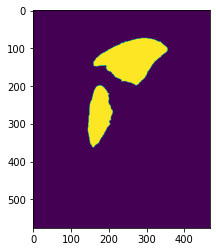

In [67]:
plt.imshow(img_pred[:,:,50])